# LOAN APPLICATION STATUS PREDICTION

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [6]:
df= pd.read_csv(r"C:\Users\mahes\Downloads\loan_prediction.csv")

In [7]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
print('Dataset have ',df.shape[0],' Rows and ',df.shape[1],' Columns')

Dataset have  614  Rows and  13  Columns


In [9]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


Applicantincome, coaplicantincome and loanamount  have right skewed data,


# Checking Null Values

In [12]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Checking Null % 

In [13]:
round((df.isnull().sum()/df.shape[0])*100,2)

Loan_ID              0.00
Gender               2.12
Married              0.49
Dependents           2.44
Education            0.00
Self_Employed        5.21
ApplicantIncome      0.00
CoapplicantIncome    0.00
LoanAmount           3.58
Loan_Amount_Term     2.28
Credit_History       8.14
Property_Area        0.00
Loan_Status          0.00
dtype: float64

<AxesSubplot:>

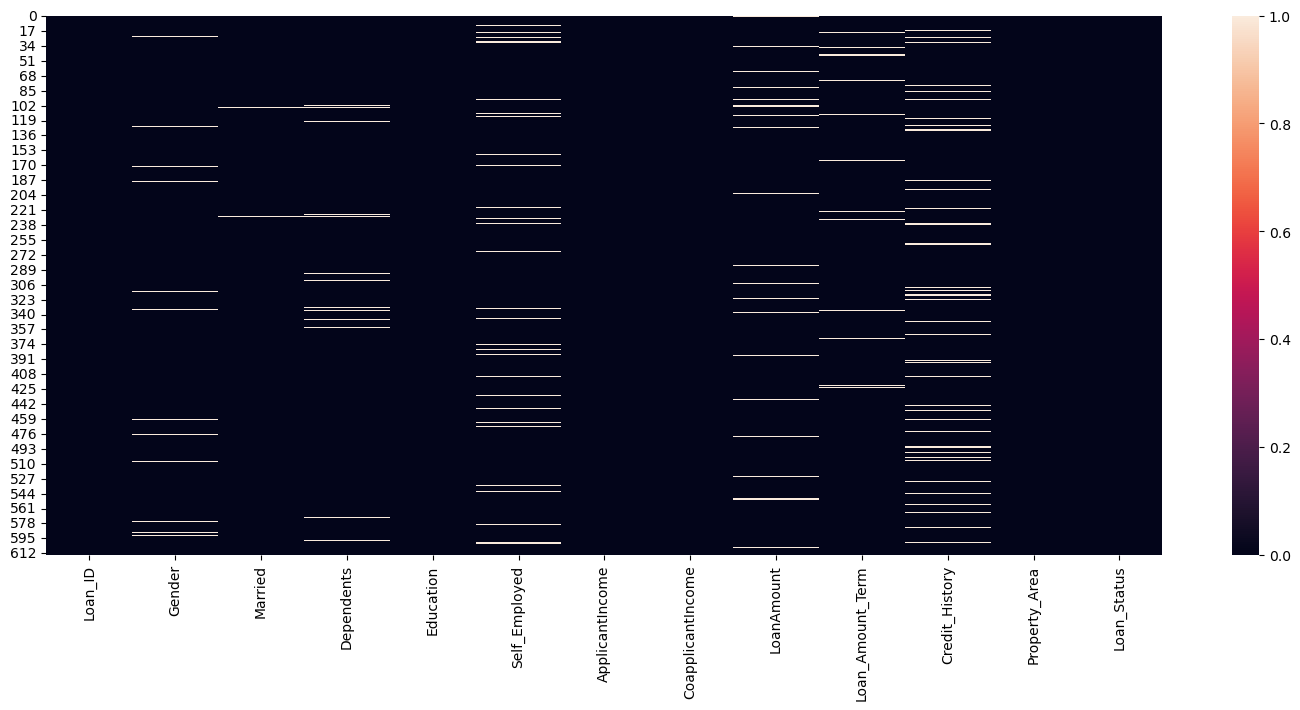

In [14]:
plt.figure(figsize=(18,7))
sns.heatmap(df.isnull())


- The column 'Gender', which is categorical, contains some missing values.
- The 'Dependents' column, which is numerical, also has some missing values.
- The 'Self_employed' column is categorical and has some missing entries.
- The 'LoanAmount' column, which is of float type, has some missing values.
- The 'Loan_amountTerm' column is an integer type and it contains some missing values.
- The 'Credit_History' column, which is also an integer type, has some missing values.

In [16]:
for i in df.columns[1:]:
    print( i ,'have unique values = ',df[i].unique(),'\n')

Gender have unique values =  ['Male' 'Female' nan] 

Married have unique values =  ['No' 'Yes' nan] 

Dependents have unique values =  ['0' '1' '2' '3+' nan] 

Education have unique values =  ['Graduate' 'Not Graduate'] 

Self_Employed have unique values =  ['No' 'Yes' nan] 

ApplicantIncome have unique values =  [ 5849  4583  3000  2583  6000  5417  2333  3036  4006 12841  3200  2500
  3073  1853  1299  4950  3596  3510  4887  2600  7660  5955  3365  3717
  9560  2799  4226  1442  3750  4166  3167  4692  3500 12500  2275  1828
  3667  3748  3600  1800  2400  3941  4695  3410  5649  5821  2645  4000
  1928  3086  4230  4616 11500  2708  2132  3366  8080  3357  3029  2609
  4945  5726 10750  7100  4300  3208  1875  4755  5266  1000  3333  3846
  2395  1378  3988  2366  8566  5695  2958  6250  3273  4133  3620  6782
  2484  1977  4188  1759  4288  4843 13650  4652  3816  3052 11417  7333
  3800  2071  5316  2929  3572  7451  5050 14583  2214  5568 10408  5667
  2137  2957  3692 23803  38

In [17]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [18]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# EDA

# Univarient Analysis

In [19]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

<AxesSubplot:xlabel='Gender', ylabel='count'>

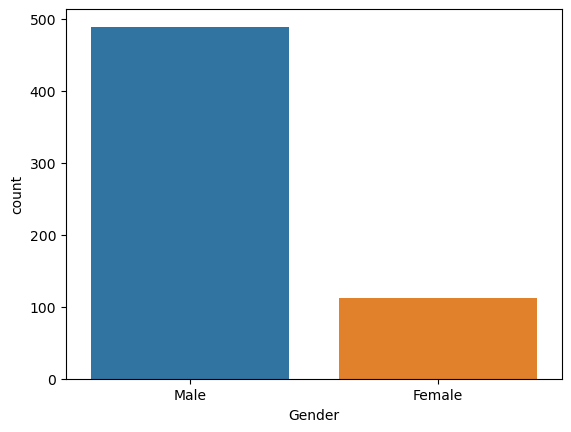

In [20]:
sns.countplot(df['Gender'])

In [21]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [22]:
df['Gender'].value_counts(normalize=True, dropna=False)

Male      0.796417
Female    0.182410
NaN       0.021173
Name: Gender, dtype: float64

approx 80% are male applicant,
approx 18% are female applicant and
2% are null values

In [23]:
df['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

<AxesSubplot:xlabel='Married', ylabel='count'>

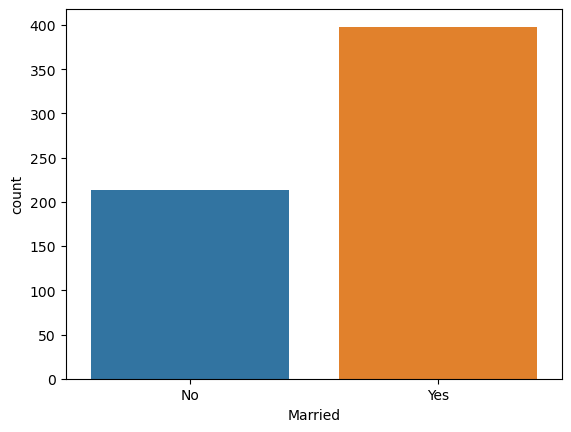

In [24]:
sns.countplot(df['Married'])

In [25]:
df['Married'].value_counts(normalize=True, dropna=False)

Yes    0.648208
No     0.346906
NaN    0.004886
Name: Married, dtype: float64

about 64.8% are married applicant whereas,
34.6% are non-married applicant

<AxesSubplot:xlabel='Gender', ylabel='count'>

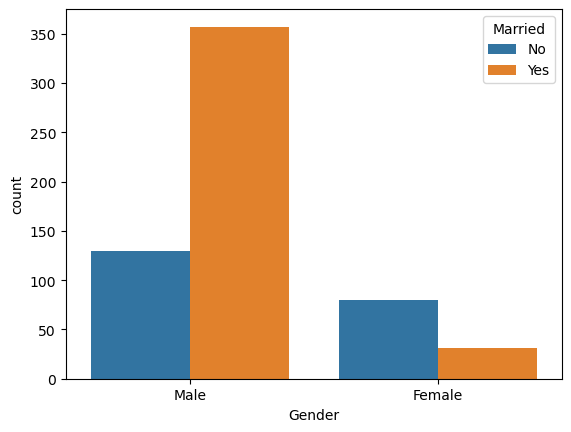

In [26]:
sns.countplot(df['Gender'], hue=df['Married'])

In [28]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [29]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

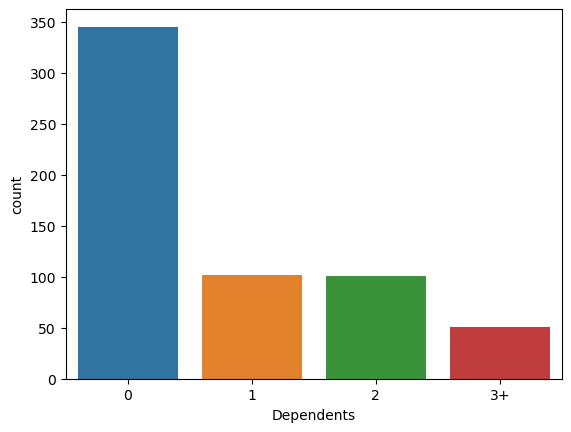

In [30]:
sns.countplot(df['Dependents'])

As we can observe, Majority applicant have 0 dependents

<AxesSubplot:xlabel='Dependents', ylabel='count'>

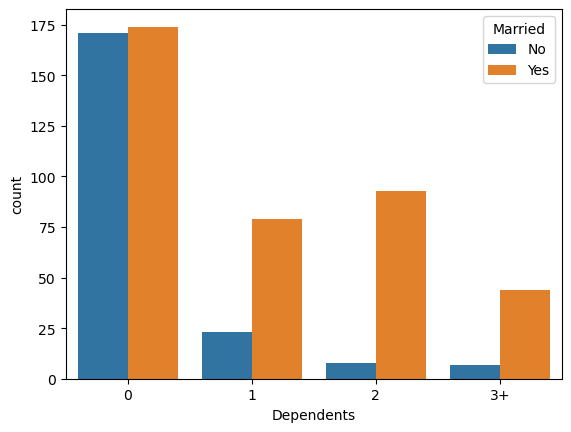

In [32]:
sns.countplot(df['Dependents'],hue=df['Married'])

As we can observe, Married have more dependents

Education feature

In [33]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [34]:
df['Education'].value_counts(normalize=True)

Graduate        0.781759
Not Graduate    0.218241
Name: Education, dtype: float64

Over 78% applicants are Graduated and 21.8% are not graduated

<AxesSubplot:xlabel='Education', ylabel='count'>

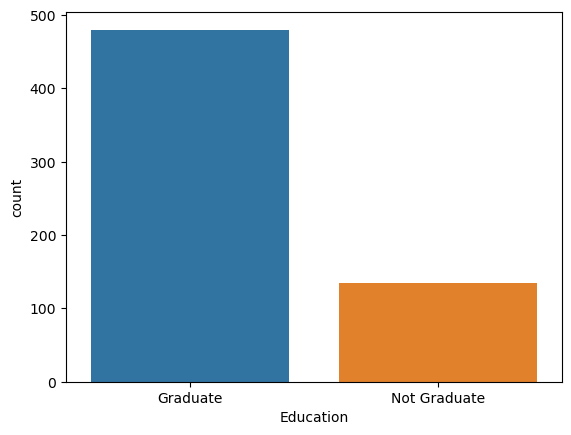

In [35]:
sns.countplot(df['Education'])

Self_Employed

In [36]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [37]:
df['Self_Employed'].value_counts(normalize=True)

No     0.859107
Yes    0.140893
Name: Self_Employed, dtype: float64

Approx 86% are employed somewhere and 
14% are self emploid

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

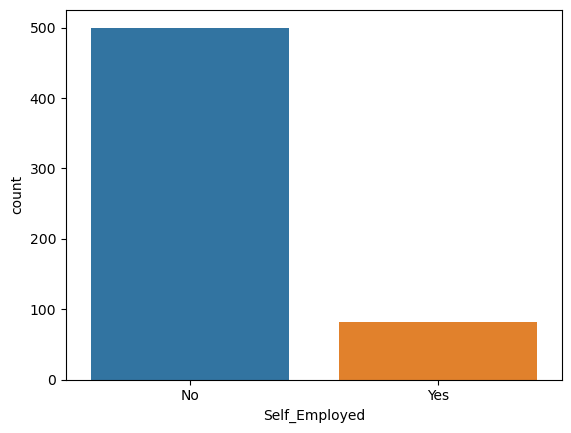

In [38]:
sns.countplot(df['Self_Employed'])

# ApplicantIncome

In [39]:
df['ApplicantIncome'].nunique()

505

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

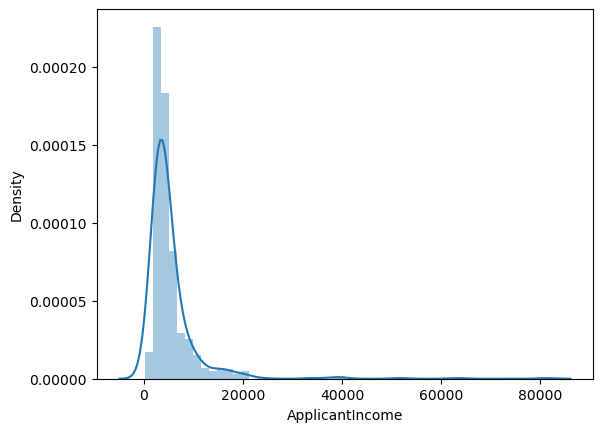

In [40]:
sns.distplot(df['ApplicantIncome'])

In [41]:
df['ApplicantIncome'].describe().T

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

# CoapplicantIncome

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

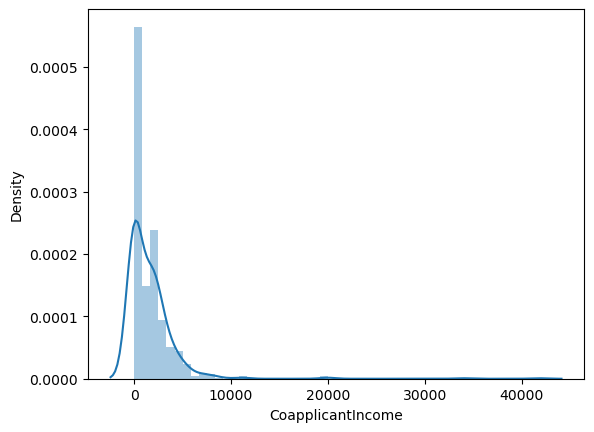

In [47]:
sns.distplot(df['CoapplicantIncome'])

# LoanAmount

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

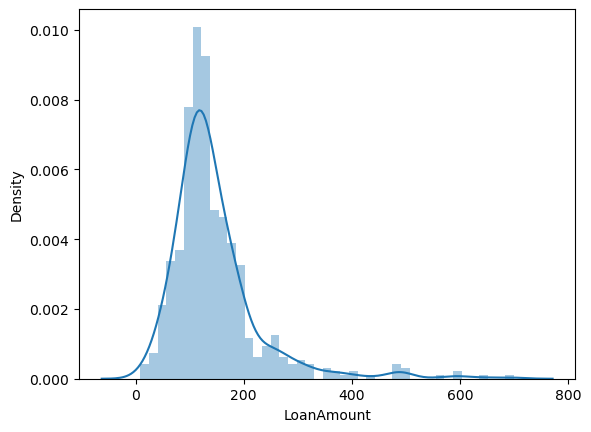

In [48]:
sns.distplot(df['LoanAmount'])

As we can observe the distribution looks like normally distributed but its right skewed.

# Loan_Amount_Term

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

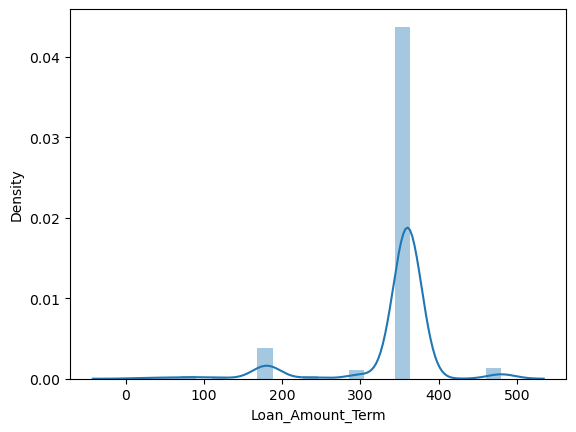

In [49]:
sns.distplot(df['Loan_Amount_Term'])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

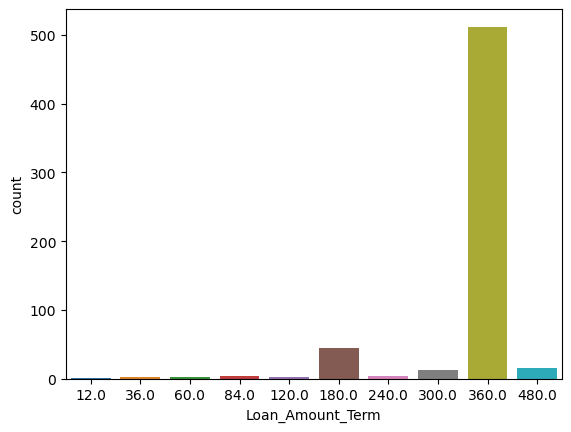

In [50]:
sns.countplot(df['Loan_Amount_Term'])

In [51]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [52]:
df['Loan_Amount_Term'].value_counts(normalize=True,dropna=False)

360.0    0.833876
180.0    0.071661
480.0    0.024430
NaN      0.022801
300.0    0.021173
240.0    0.006515
84.0     0.006515
120.0    0.004886
60.0     0.003257
36.0     0.003257
12.0     0.001629
Name: Loan_Amount_Term, dtype: float64

About, 83% applicant applied for loan for 30 years

# Credit_History

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

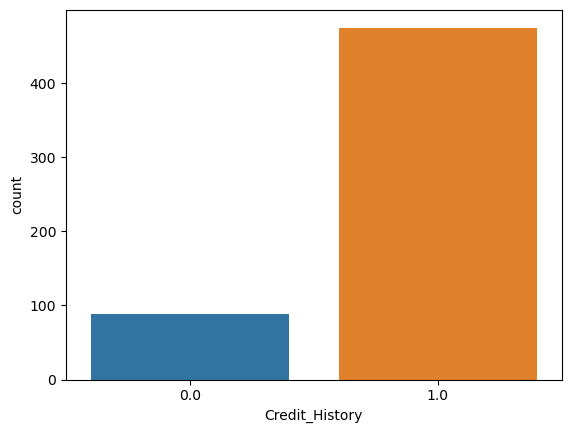

In [53]:
sns.countplot(df['Credit_History'])

In [54]:
df['Credit_History'].value_counts(normalize=True,dropna=False)

1.0    0.773616
0.0    0.144951
NaN    0.081433
Name: Credit_History, dtype: float64

About, 77.3% applicants credit history available

Property_Area

In [55]:
df['Property_Area'].value_counts(normalize=True,dropna=False)

Semiurban    0.379479
Urban        0.328990
Rural        0.291531
Name: Property_Area, dtype: float64

# Loan_Status

In [56]:
df['Loan_Status'].value_counts(normalize=True,dropna=False)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

This dataset is not balanced. In fact, 68.7% of applicants had their loans approved, while 31.2% did not receive loan approval.

#  Exploratory data Analysis

# Bivarient

# Gender  VS Loan

In [57]:
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


 The 'Loan_ID' is not necessary. It doesn't contribute any predictive information for determining loan approval. Therefore, we can eliminate this from our data.

<AxesSubplot:xlabel='Gender', ylabel='count'>

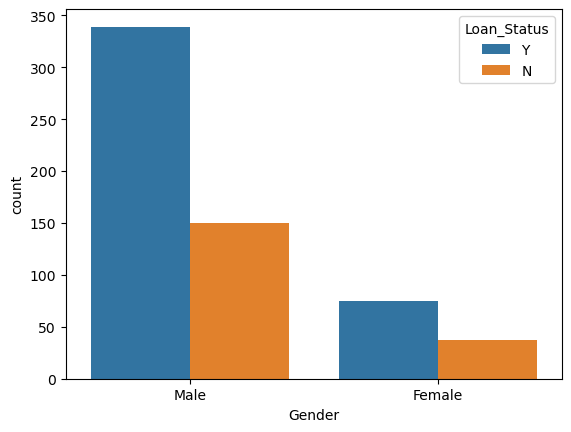

In [58]:
sns.countplot(df['Gender'],hue=df['Loan_Status'], data=df)

In [59]:
df.groupby('Gender')['Loan_Status'].value_counts(normalize=True,dropna=False)

Gender  Loan_Status
Female  Y              0.669643
        N              0.330357
Male    Y              0.693252
        N              0.306748
Name: Loan_Status, dtype: float64

In terms of gender and loan approval:

- About 70% of male applicants were granted loans, while 30% were not.
- Approximately 67% of female applicants received loans, whereas 33% did not.

It appears that the loan company did not discriminate based on gender.

# Married  vs Loan

<AxesSubplot:xlabel='Married', ylabel='count'>

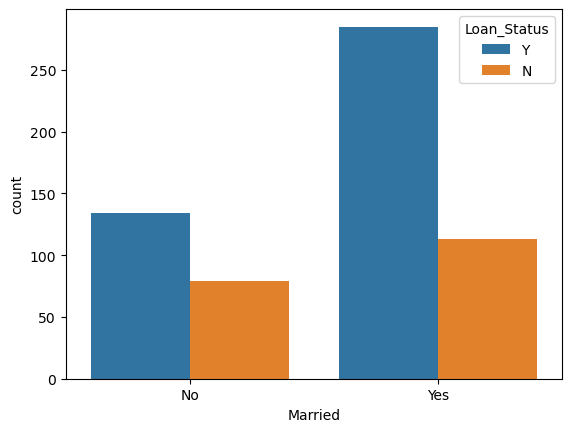

In [60]:
sns.countplot(df['Married'],hue=df['Loan_Status'])

In [61]:
df['Married'].value_counts(normalize=True,dropna=False)

Yes    0.648208
No     0.346906
NaN    0.004886
Name: Married, dtype: float64

In [62]:
df.groupby('Married')['Loan_Status'].value_counts(normalize=True,dropna=False)

Married  Loan_Status
No       Y              0.629108
         N              0.370892
Yes      Y              0.716080
         N              0.283920
Name: Loan_Status, dtype: float64

- Around 65% of the applicants are married, and out of these, 71% have had their loans approved.
- On the other hand, about 35% of the applicants are unmarried, with 63% of them receiving loan approval.

## Dependents vs Loan

<AxesSubplot:xlabel='Dependents', ylabel='count'>

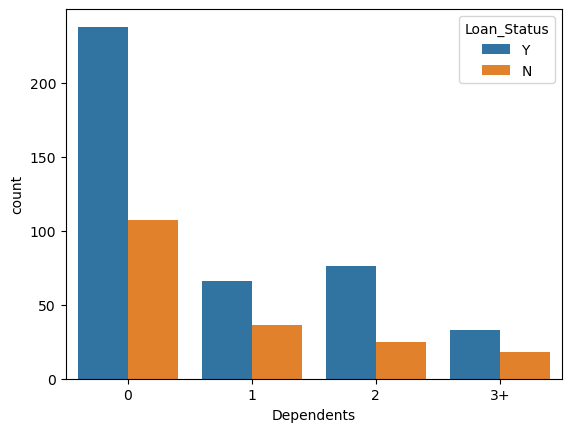

In [63]:
sns.countplot(df['Dependents'],hue='Loan_Status', data=df)

As we can observe that the, Majority of the population have 0 dependent and are accepted for loan

## Education  vs Loan

<AxesSubplot:xlabel='Education', ylabel='count'>

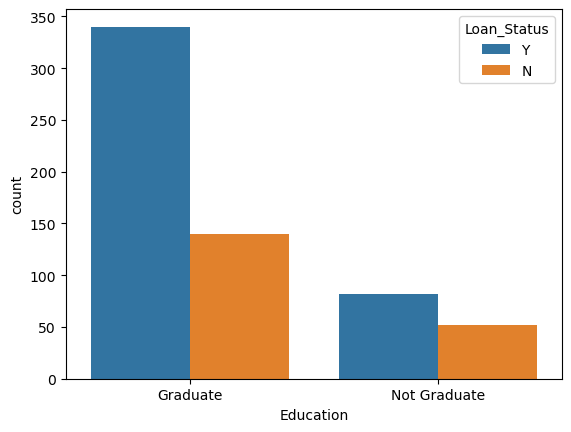

In [65]:
sns.countplot('Education',hue='Loan_Status', data=df)

In [66]:
df['Education'].value_counts(normalize=True,dropna=False)

Graduate        0.781759
Not Graduate    0.218241
Name: Education, dtype: float64

In [67]:
df.groupby('Education')['Loan_Status'].value_counts(normalize=True,dropna=False)

Education     Loan_Status
Graduate      Y              0.708333
              N              0.291667
Not Graduate  Y              0.611940
              N              0.388060
Name: Loan_Status, dtype: float64

- Around 78% of the applicants have a graduation degree, and among them, 70% were successful in securing a loan.
- Approximately 22% of the applicants do not have a graduation degree, yet 61% of them managed to get a loan.

It seems that individuals with a graduation degree have a slightly higher likelihood of obtaining a loan compared to those without a degree.

## Self_Employed vs Loan

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

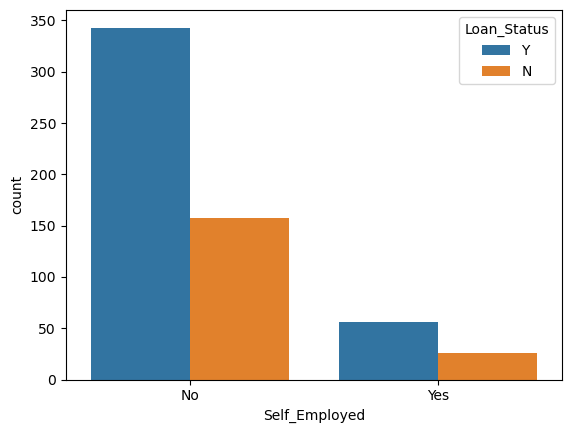

In [68]:
sns.countplot('Self_Employed',hue='Loan_Status',data=df)

In [69]:
df['Self_Employed'].value_counts(normalize=True,dropna=False)

No     0.814332
Yes    0.133550
NaN    0.052117
Name: Self_Employed, dtype: float64

In [70]:
df.groupby('Self_Employed')['Loan_Status'].value_counts(normalize=True,dropna=False)

Self_Employed  Loan_Status
No             Y              0.686000
               N              0.314000
Yes            Y              0.682927
               N              0.317073
Name: Loan_Status, dtype: float64

- Approximately 13% of the loan applicants are self-employed, and among them, 68% have been successful in obtaining a loan.
- Regardless of whether an applicant is self-employed or not, there's a 68% probability that they will be granted a loan.

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

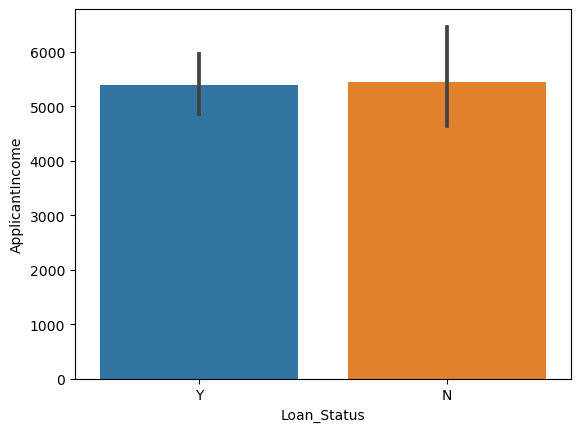

In [71]:
sns.barplot(x='Loan_Status',y='ApplicantIncome', data=df)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Loan_Status'>

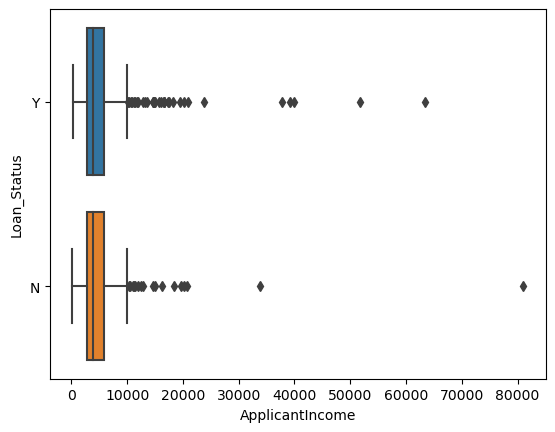

In [72]:
sns.boxplot(x=df['ApplicantIncome'],y=df['Loan_Status'],orient='h')

# CoapplicantIncome  vs Loan

<AxesSubplot:xlabel='Loan_Status', ylabel='CoapplicantIncome'>

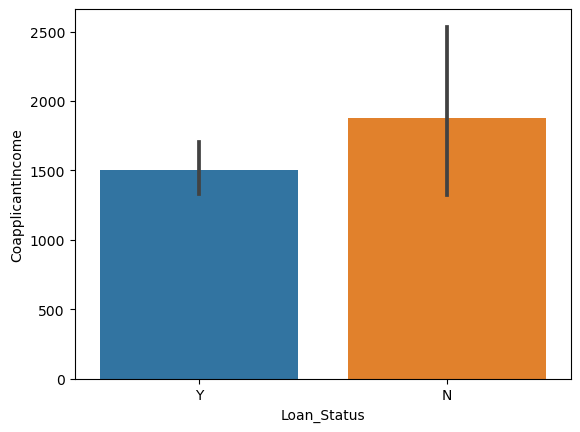

In [73]:
sns.barplot(x='Loan_Status',y='CoapplicantIncome', data=df)

# LoanAmount vs Loan

<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

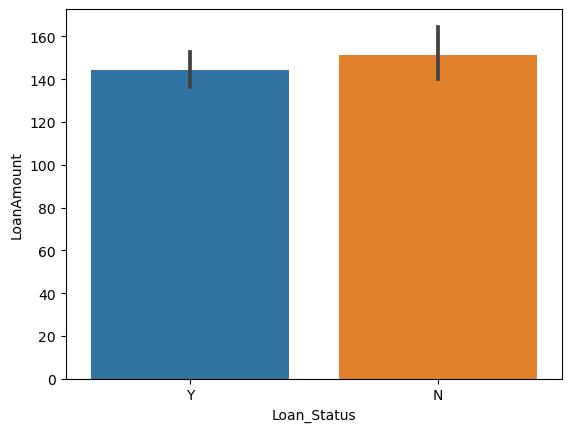

In [74]:
sns.barplot(y=df['LoanAmount'],x=df['Loan_Status'])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

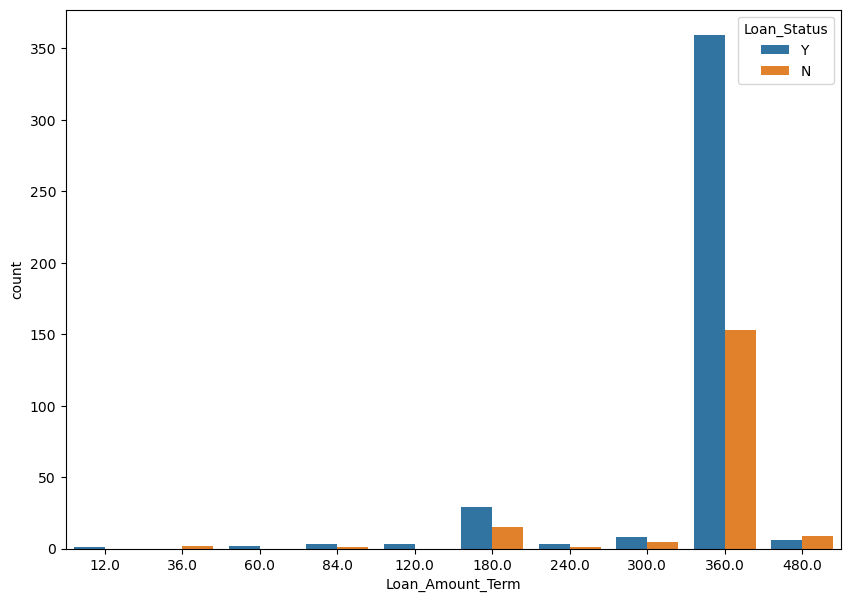

In [76]:
plt.figure(figsize=(10,7))
sns.countplot(df['Loan_Amount_Term'],hue='Loan_Status',data=df)

- The majority of loan applications were for a term of 30 years, and most of these were approved.
- However, if a loan was requested for a term of 40 years, the likelihood of rejection was higher.

# Credit_History vs Loan

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

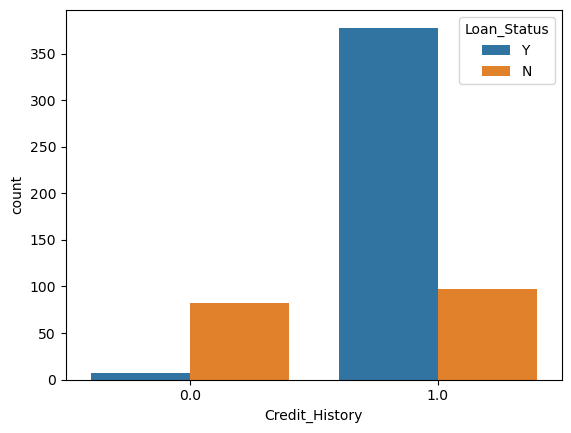

In [78]:
sns.countplot(df['Credit_History'],hue=df['Loan_Status'])

 if you have a credit history, the likelihood of your loan being approved is higher.


In [80]:
df.groupby('Credit_History')['Loan_Status'].value_counts(normalize=True,dropna=False)

Credit_History  Loan_Status
0.0             N              0.921348
                Y              0.078652
1.0             Y              0.795789
                N              0.204211
Name: Loan_Status, dtype: float64

 If Credit History is availabe, 80% chances for approved loan

 If credit History is not available, 92% chances for loan rejection

# Property_Area vs Loan

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

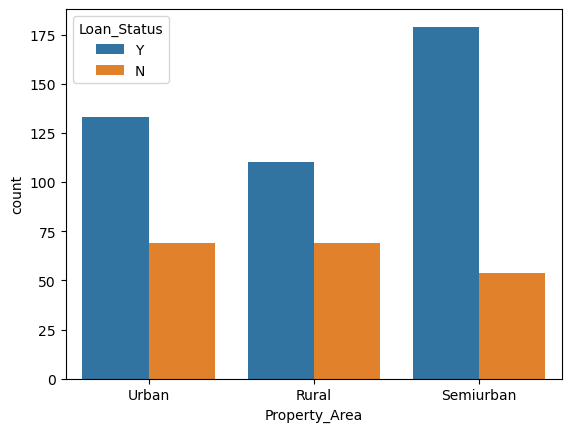

In [81]:
sns.countplot(df['Property_Area'],hue=df['Loan_Status'])

As we can observe, More applicants are likely from SemiUrban area granted loans

# Convert Target Variable into Interegt

In [97]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [98]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Loan_Status']=le.fit_transform(df['Loan_Status'])

In [99]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


### Loan Granted= 1,  Loan not Granted=0

# Multivarient EDA

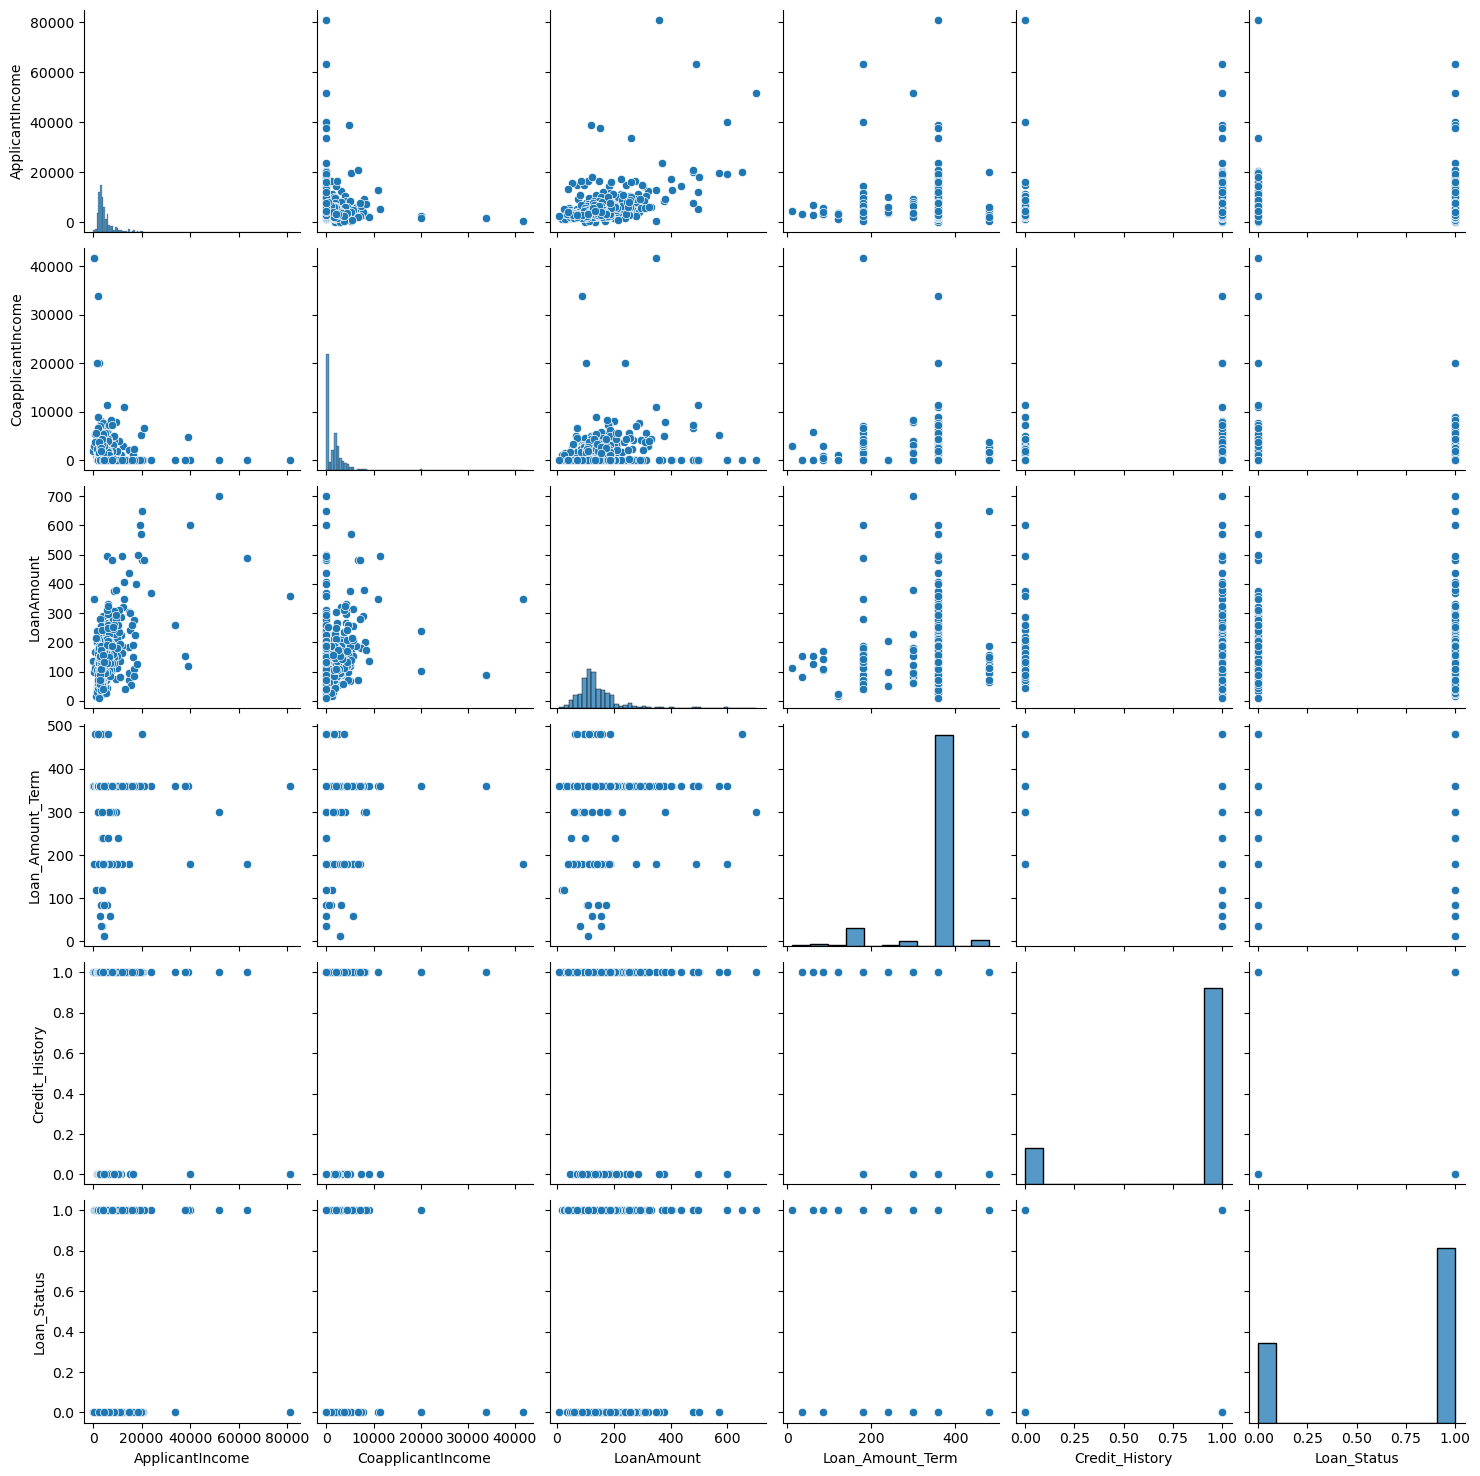

In [100]:
sns.pairplot(df)

The LoanAmount have positive correlation with ApplicantIncome


In [101]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


<AxesSubplot:>

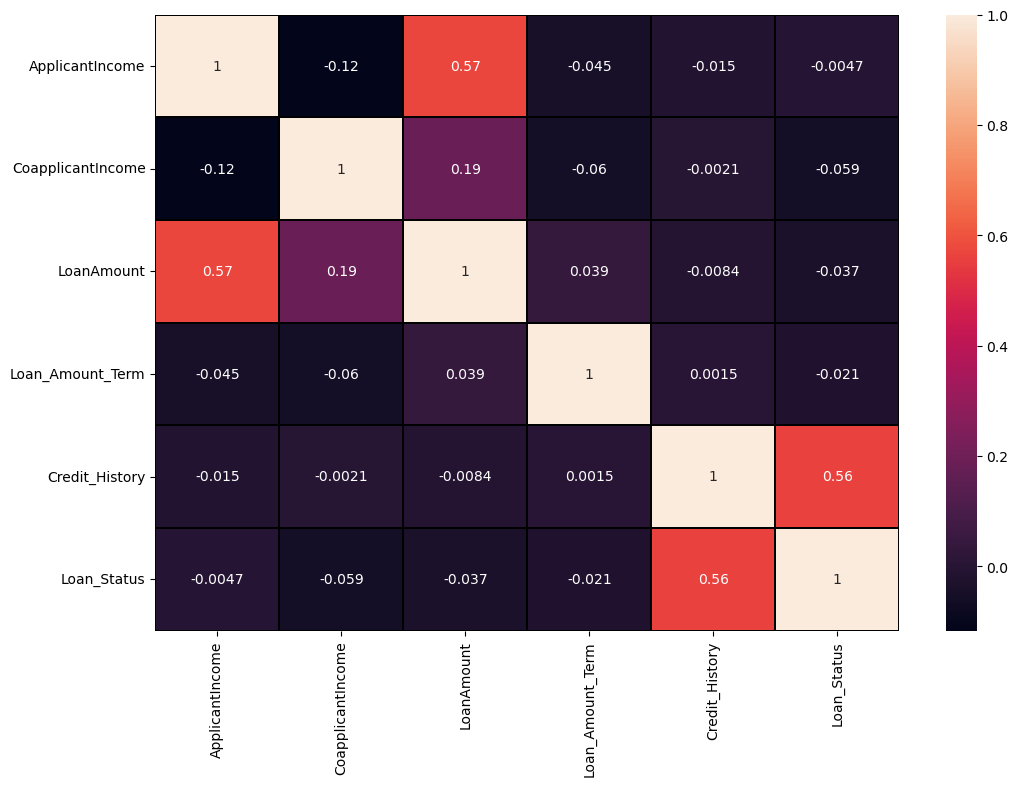

In [103]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,linecolor='black',linewidths=.25)

- There's a strong positive correlation of 0.56 between 'Credit_History' and 'Loan_Status', indicating that having a credit history is likely to influence loan approval positively.
- 'LoanAmount' and 'ApplicantIncome' also have a good positive correlation of 0.57, suggesting that higher applicant income might be associated with larger loan amounts.
- However, 'ApplicantIncome' has a very low negative correlation of -0.0047 with the target variable, implying that the applicant's income has negligible impact on the target variable in this dataset.

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

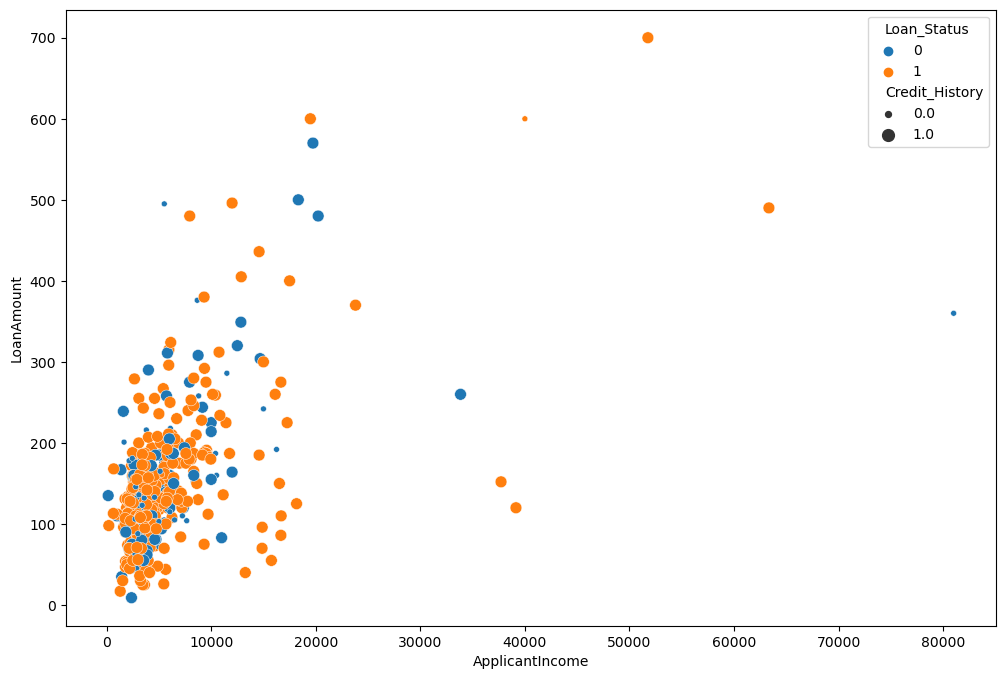

In [104]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='ApplicantIncome',y='LoanAmount',hue='Loan_Status',size='Credit_History',data=df)

We can observe that some outliers are present in Applicant income

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='LoanAmount'>

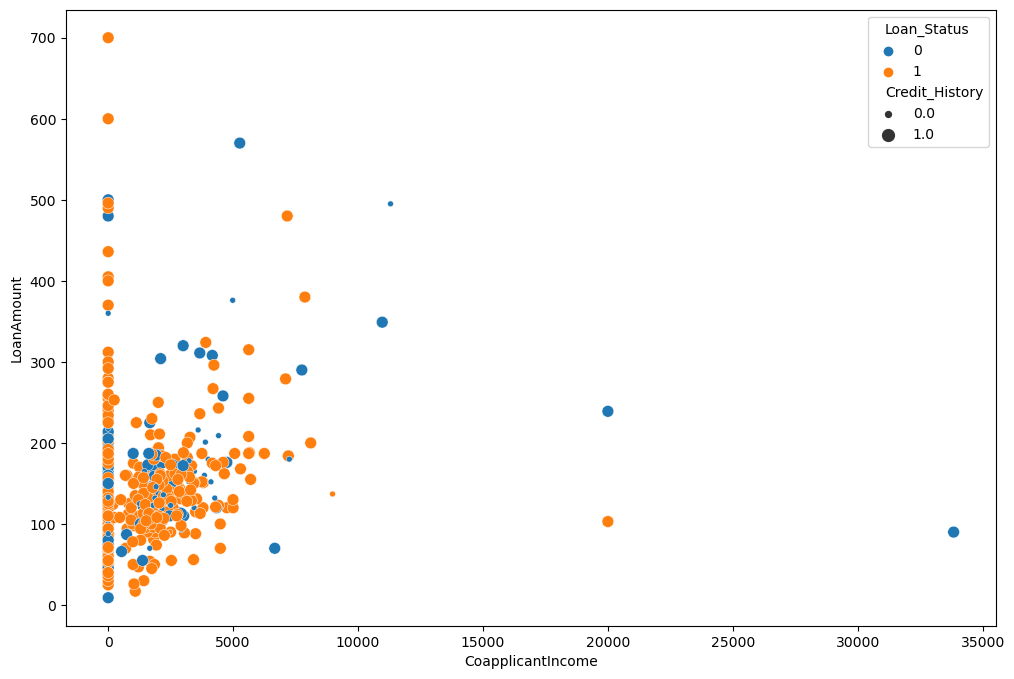

In [106]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='CoapplicantIncome',y='LoanAmount',hue='Loan_Status',size='Credit_History',data=df)

Even coapplicant income is 0, Loan has been granted

In [108]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


# Missing Values

In [109]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [110]:
num =df.select_dtypes(np.number)
num

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,5849,0.0,NaN,360.0,1.0,1
1,4583,1508.0,128.0,360.0,1.0,0
2,3000,0.0,66.0,360.0,1.0,1
3,2583,2358.0,120.0,360.0,1.0,1
4,6000,0.0,141.0,360.0,1.0,1
...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,1
610,4106,0.0,40.0,180.0,1.0,1
611,8072,240.0,253.0,360.0,1.0,1
612,7583,0.0,187.0,360.0,1.0,1


In [111]:
cat=df.select_dtypes('O')
cat

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,LP001002,Male,No,0,Graduate,No,Urban
1,LP001003,Male,Yes,1,Graduate,No,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,Urban
4,LP001008,Male,No,0,Graduate,No,Urban
...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural
610,LP002979,Male,Yes,3+,Graduate,No,Rural
611,LP002983,Male,Yes,1,Graduate,No,Urban
612,LP002984,Male,Yes,2,Graduate,No,Urban


In [112]:
num.isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Loan_Status           0
dtype: int64

In [113]:
df['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [114]:
df['LoanAmount'].median()

128.0

In [115]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [116]:
df['Loan_Amount_Term'].mode()

0    360.0
Name: Loan_Amount_Term, dtype: float64

In [117]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [118]:
cat.isnull().sum()

Loan_ID           0
Gender           13
Married           3
Dependents       15
Education         0
Self_Employed    32
Property_Area     0
dtype: int64

In [119]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

In [120]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [121]:
df['Loan_Amount_Term'].dtypes

dtype('float64')

In [122]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)

In [123]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [124]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int32
dtype: object

In [125]:
df.drop('Loan_ID', axis=1, inplace=True)

In [126]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int32
dtype: object

In [127]:
df['Dependents'].replace('3+',3, inplace=True)

In [128]:
df['Dependents']=df['Dependents'].astype(int)

In [129]:
df.dtypes

Gender                object
Married               object
Dependents             int32
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int32
dtype: object

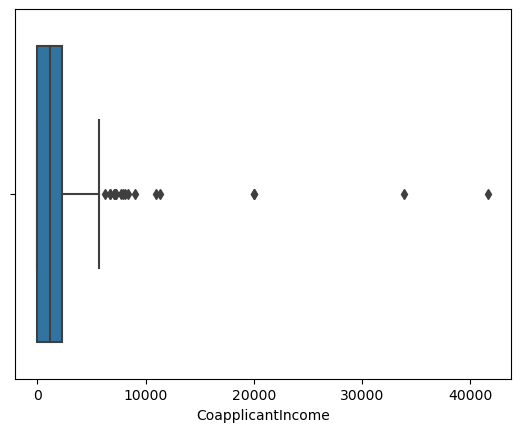

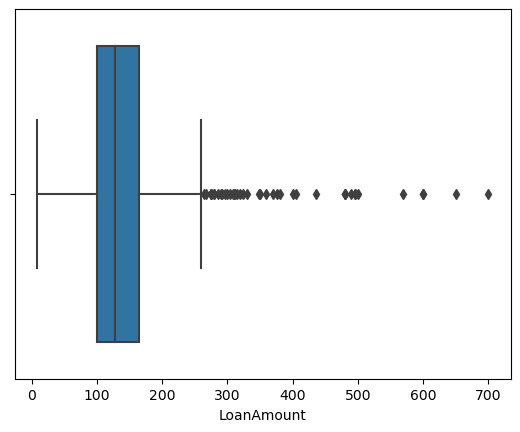

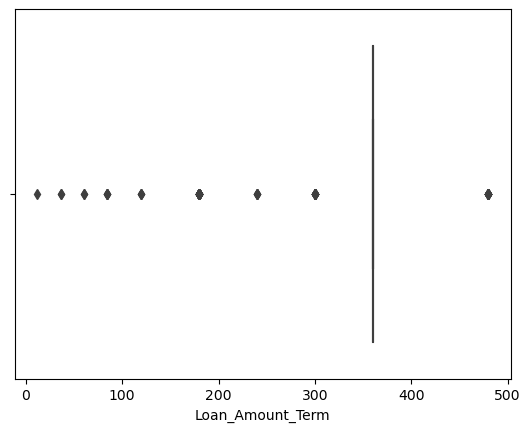

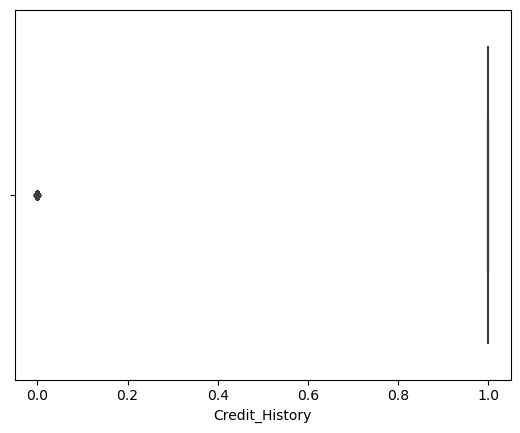

In [130]:
for i in df.columns:
    if df[i].dtypes==np.number:
        sns.boxplot(df[i])
        plt.show()

In [131]:
df['TotalIncome']=df['ApplicantIncome']+ df['CoapplicantIncome']

<AxesSubplot:xlabel='TotalIncome', ylabel='Density'>

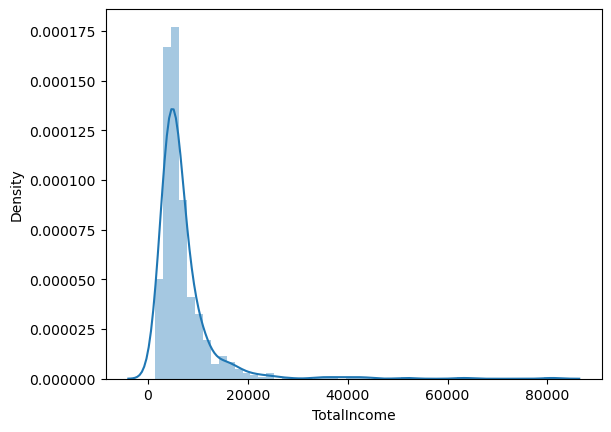

In [132]:
sns.distplot(df['TotalIncome'])

In [133]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,6000.0


In [134]:
df.drop(['ApplicantIncome','CoapplicantIncome'],axis=1,inplace=True)

In [135]:
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,Male,No,0,Graduate,No,128.0,360.0,1.0,Urban,1,5849.0
1,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,0,6091.0


In [136]:
df.dtypes

Gender               object
Married              object
Dependents            int32
Education            object
Self_Employed        object
LoanAmount          float64
Loan_Amount_Term    float64
Credit_History      float64
Property_Area        object
Loan_Status           int32
TotalIncome         float64
dtype: object

<AxesSubplot:xlabel='LoanAmount'>

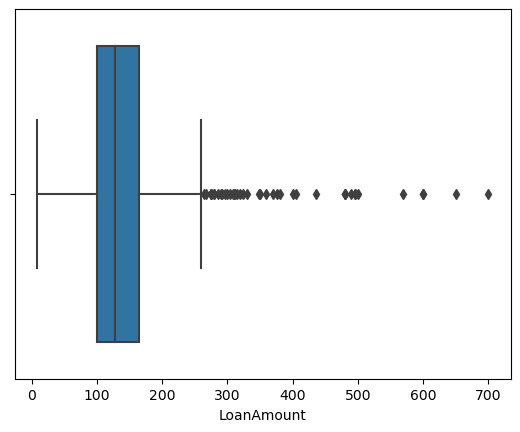

In [137]:
sns.boxplot(df['LoanAmount'])

<AxesSubplot:xlabel='TotalIncome'>

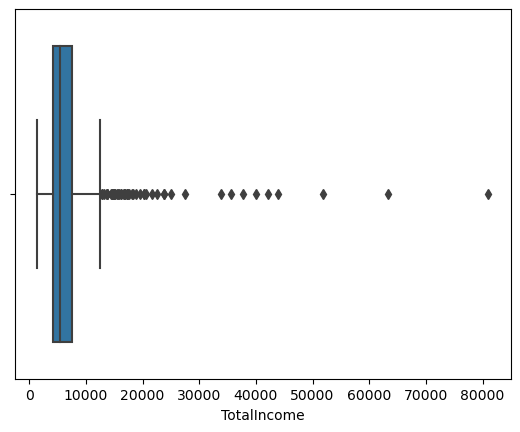

In [138]:
sns.boxplot(df['TotalIncome'])

In [139]:
IQR= df['LoanAmount'].quantile(.75)- df['LoanAmount'].quantile(.25)
IQR

64.5

In [140]:
upper= df['LoanAmount'].quantile(.75) +(1.5 * IQR)
upper

261.5

In [141]:
df['LoanAmount']= np.where(df['LoanAmount']>upper,upper,df['LoanAmount'])

<AxesSubplot:xlabel='LoanAmount'>

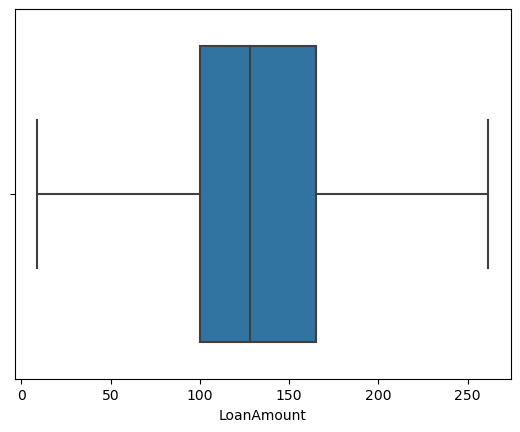

In [142]:
sns.boxplot(df['LoanAmount'])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

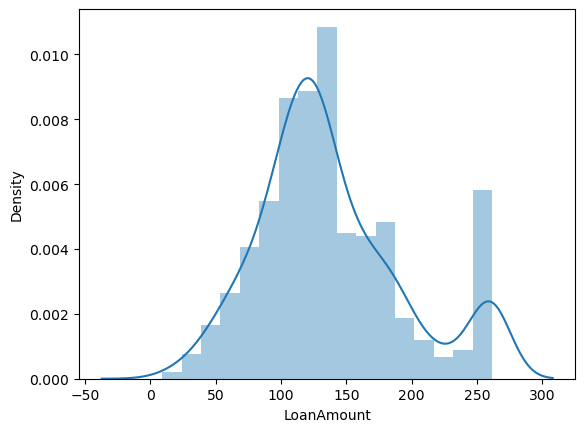

In [143]:
sns.distplot(df['LoanAmount'])

In [144]:
IQR= df['TotalIncome'].quantile(.75)- df['TotalIncome'].quantile(.25)
IQR

3355.75

In [145]:
upper= df['TotalIncome'].quantile(.75) +(1.5 * IQR)
upper

12555.375

In [146]:
df['TotalIncome']= np.where(df['TotalIncome']>upper,upper,df['TotalIncome'])

<AxesSubplot:xlabel='TotalIncome'>

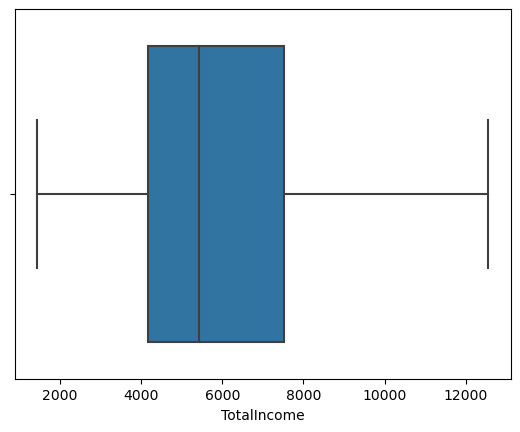

In [147]:
sns.boxplot(df['TotalIncome'])

In [148]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,Male,No,0,Graduate,No,128.0,360.0,1.0,Urban,1,5849.0
1,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,0,6091.0
2,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,1,3000.0
3,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,1,4941.0
4,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,1,6000.0


In [149]:
df.dtypes

Gender               object
Married              object
Dependents            int32
Education            object
Self_Employed        object
LoanAmount          float64
Loan_Amount_Term    float64
Credit_History      float64
Property_Area        object
Loan_Status           int32
TotalIncome         float64
dtype: object

In [150]:
X= df.drop('Loan_Status', axis=1)
Y=df['Loan_Status']

In [151]:
X.shape , Y.shape

((614, 10), (614,))

In [152]:
X=pd.get_dummies(X, drop_first=True)

In [153]:
X.shape

(614, 11)

In [154]:
Y.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

# Balancing Dataset 

In [155]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()

In [156]:
X,Y=sm.fit_resample(X,Y)

In [157]:
X.shape , Y.shape

((844, 11), (844,))

# Transformation

In [158]:
X.skew()

Dependents                 1.193346
LoanAmount                 0.695457
Loan_Amount_Term          -2.541512
Credit_History            -1.305365
TotalIncome                0.917632
Gender_Male               -1.286412
Married_Yes               -0.327124
Education_Not Graduate     1.667984
Self_Employed_Yes          2.636686
Property_Area_Semiurban    0.857240
Property_Area_Urban        0.990380
dtype: float64

In [159]:
from sklearn.preprocessing import power_transform
transformed=power_transform(X)

# Scaled

In [160]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [161]:
scaled=sc.fit_transform(transformed)

In [162]:
X=scaled

# Machine Learning

In [166]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

In [167]:
# FInd best Random_state

maxaccu=0
maxRS=0

for i in range(0,200):
    x_train,x_test,y_train,y_test= train_test_split(X,Y,random_state=i,test_size=.20)
    LR= LogisticRegression()
    LR.fit(x_train,y_train)
    pred= LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)
    
    

Best accuracy is  0.863905325443787 on Random State = 148


In [168]:
# Select Random State 122

In [169]:
x_train,x_test,y_train,y_test= train_test_split(X,Y,random_state=122,test_size=.20)

In [170]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [171]:
LR_model= LogisticRegression()
RD_model= RidgeClassifier()
DT_model= DecisionTreeClassifier()
SV_model= SVC()
KNR_model= KNeighborsClassifier()
RFR_model= RandomForestClassifier()
XGB_model= XGBClassifier()
SGH_model= SGDClassifier()
Bag_model=BaggingClassifier()
ADA_model=AdaBoostClassifier()
GB_model= GradientBoostingClassifier()

model=[LR_model,RD_model,DT_model,SV_model,KNR_model,RFR_model,XGB_model,SGH_model,Bag_model,ADA_model,GB_model ]

In [172]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred= m.predict(x_test)
    print('Accuracy_Score of ',m, 'is', accuracy_score(y_test,pred)*100)
    print('Confusion Matrix of ',m,' is \n', confusion_matrix(y_test,pred) )
    print(classification_report(y_test,pred))
    print('*'*50)

Accuracy_Score of  LogisticRegression() is 82.84023668639054
Confusion Matrix of  LogisticRegression()  is 
 [[61 23]
 [ 6 79]]
              precision    recall  f1-score   support

           0       0.91      0.73      0.81        84
           1       0.77      0.93      0.84        85

    accuracy                           0.83       169
   macro avg       0.84      0.83      0.83       169
weighted avg       0.84      0.83      0.83       169

**************************************************
Accuracy_Score of  RidgeClassifier() is 81.65680473372781
Confusion Matrix of  RidgeClassifier()  is 
 [[56 28]
 [ 3 82]]
              precision    recall  f1-score   support

           0       0.95      0.67      0.78        84
           1       0.75      0.96      0.84        85

    accuracy                           0.82       169
   macro avg       0.85      0.82      0.81       169
weighted avg       0.85      0.82      0.81       169

*********************************************

Accuracy_Score of  RandomForestClassifier() is 86.98224852071006

# Cross Validation

In [173]:
from sklearn.model_selection import cross_val_score

In [174]:
for i in model:
    print('Accuracy_Score of ',i, 'is', accuracy_score(y_test,i.predict(x_test))*100)
    print("cross Validation accuracy score of ",i ," is ",cross_val_score(i,X,Y,cv=5, scoring='accuracy').mean()*100)
    print('*'*50)

Accuracy_Score of  LogisticRegression() is 82.84023668639054
cross Validation accuracy score of  LogisticRegression()  is  78.79825302902226
**************************************************
Accuracy_Score of  RidgeClassifier() is 81.65680473372781
cross Validation accuracy score of  RidgeClassifier()  is  78.3269935193012
**************************************************
Accuracy_Score of  DecisionTreeClassifier() is 81.06508875739645
cross Validation accuracy score of  DecisionTreeClassifier()  is  73.70667793744717
**************************************************
Accuracy_Score of  SVC() is 82.84023668639054
cross Validation accuracy score of  SVC()  is  78.92082276697661
**************************************************
Accuracy_Score of  KNeighborsClassifier() is 82.24852071005917
cross Validation accuracy score of  KNeighborsClassifier()  is  77.37602141448295
**************************************************
Accuracy_Score of  RandomForestClassifier() is 84.02366863905326


Accuracy_Score of  GradientBoostingClassifier() is 82.24852071005917
cross Validation accuracy score of  GradientBoostingClassifier()  is  81.28627782473936

GradientBoostingClassifier()

In [175]:
from sklearn.model_selection import GridSearchCV

In [176]:
params= {"learning_rate"    : [0.01,.05,.1,.2,.3,.5 ] ,
         'n_estimators':[5,50,100,200,300,400],
         "max_depth"        : [ 3, 4, 5, 6, 8]
          }

In [177]:
GCV= GridSearchCV(GB_model,params,cv=5,scoring='accuracy', n_jobs=-1)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.5],
                         'max_depth': [3, 4, 5, 6, 8],
                         'n_estimators': [5, 50, 100, 200, 300, 400]},
             scoring='accuracy')

In [178]:
GCV.best_estimator_

GradientBoostingClassifier(learning_rate=0.05, max_depth=6, n_estimators=50)

In [179]:
GCV.best_params_

{'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 50}

In [180]:
pred=GCV.best_estimator_.predict(x_test)

In [181]:
accuracy_score(y_test,pred)

0.8224852071005917

In [182]:
print('Accuracy score:', round(accuracy_score(y_test,pred) * 100, 2))
print('F1 score:', round(f1_score(y_test,pred) * 100, 2))

Accuracy score: 82.25
F1 score: 83.52


<AxesSubplot:>

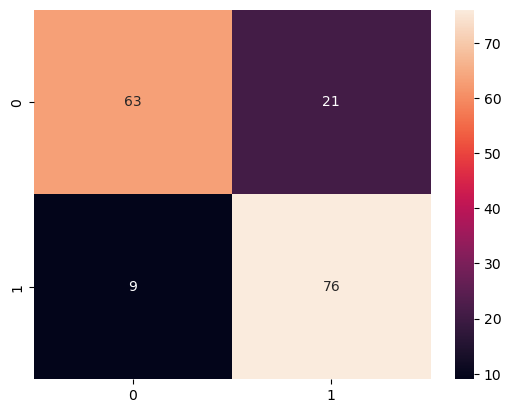

In [183]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)
sns.heatmap(confusion_matrix(y_test,pred),annot=True, fmt='d')

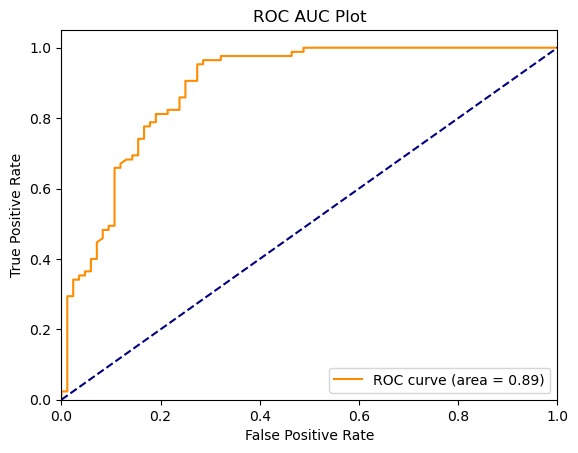

In [195]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming GCV.best_estimator_ is your trained model
y_score = GCV.best_estimator_.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Plot')
plt.legend(loc="lower right")
plt.show()


AUC score is 90%

# Saving the Model

In [196]:
import joblib
joblib.dump(GCV.best_estimator_,"Loan_Application.pkl")

['Loan_Application.pkl']